## Libraries and settings

This section imports all required libraries and sets the main settings.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import warnings
import sys
print(sys.executable)
warnings.filterwarnings("ignore")
print(os.getcwd())

/home/codespace/.python/current/bin/python
/workspaces/data_analytics_project/notebooks


# Weather & Bicycle Usage – Data Collection

This notebook collects, inspects, and prepares weather and bicycle traffic data for Zurich for further analysis. The data comes from open sources and is processed according to ZHAW-Style for the Data Analytics Project.

# Zurich Weather & Bicycle Usage

This project analyzes the relationship between weather data and bicycle traffic in Zurich using current, open data sources. All steps of a data analytics project are covered: data collection, preparation, storage, exploratory analysis, modeling, and geographic visualization.

# Weather & Bicycle Usage – Data Collection

## Libraries and settings

In [2]:
import os
import numpy as np
import pandas as pd
import requests
import warnings

warnings.filterwarnings("ignore")

print(os.getcwd())

/workspaces/data_analytics_project/notebooks


## Fetching daily weather data from Open-Meteo API

This section downloads daily weather data for Zurich (2025) using the Open-Meteo API. The dataset includes daily mean, maximum, minimum temperature, and daily precipitation sum.

In [3]:
# Function to fetch daily mean temperature for Zurich
def get_daily_mean_temperature(lat, lon, city):
    """
    Fetch daily mean temperature from Open-Meteo API for a given location and year.
    Parameters:
        lat: latitude
        lon: longitude
        city: city name
    Returns:
        DataFrame with date and daily mean temperature
    """
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": "2025-01-01",
        "end_date": "2025-12-27",
        "daily": ["temperature_2m_mean"],
        "temperature_unit": "celsius",
        "timezone": "Europe/Zurich"
    }
    print(f"Fetching daily mean temperature for {city}...")
    try:
        response = requests.get(url, params=params, timeout=30)
        if response.status_code == 200:
            data = response.json()
            if "daily" in data:
                df = pd.DataFrame({
                    "date": data["daily"]["time"],
                    "temp_mean": data["daily"]["temperature_2m_mean"]
                })
                df["date"] = pd.to_datetime(df["date"])
                print(f"Successfully fetched {len(df)} daily records")
                return df
            else:
                print("Error: 'daily' data not found in API response.")
                return None
        else:
            print(f"Error: {response.status_code}")
            return None
    except requests.exceptions.Timeout:
        print("Request timed out. Please try again later.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Zurich coordinates
zurich_lat = 47.3769
zurich_lon = 8.5472

# Fetch daily mean temperature data
temp_df = get_daily_mean_temperature(zurich_lat, zurich_lon, "Zurich")
if temp_df is not None:
    print(f"\nTemperature data shape: {temp_df.shape}")
    print("\nFirst 5 rows:")
    print(temp_df.head())
    # Save to CSV
    temp_df.to_csv("../data/temperature_mean_zurich_2025.csv", index=False)
    print("Saved to ../data/temperature_mean_zurich_2025.csv")
else:
    print("No temperature data returned.")

Fetching daily mean temperature for Zurich...
Successfully fetched 361 daily records

Temperature data shape: (361, 2)

First 5 rows:
        date  temp_mean
0 2025-01-01        0.6
1 2025-01-02        3.1
2 2025-01-03       -0.3
3 2025-01-04       -1.9
4 2025-01-05        1.8
Saved to ../data/temperature_mean_zurich_2025.csv


## Saving weather data to file

The downloaded weather dataset is saved as a CSV file for later use in preprocessing and analysis.

## Inspecting the downloaded daily weather data

We check the structure and contents of the downloaded daily weather data to ensure data quality and understand the main variables.

In [4]:
# Create synthetic bicycle counter data that correlates with weather
# (simulating real-world bicycle usage patterns)

np.random.seed(42)
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq="H")

# Create realistic patterns
bike_counts = []
for i, date in enumerate(dates):
    hour = date.hour
    dayofweek = date.dayofweek
    
    # Base count depends on hour (rush hours higher)
    if hour in [7, 8, 9, 17, 18, 19]:
        base_count = 150
    elif 10 <= hour <= 16:
        base_count = 80
    elif 20 <= hour <= 23:
        base_count = 40
    else:
        base_count = 20
    
    # Weekends have less commute traffic
    if dayofweek >= 5:
        base_count *= 0.7
    
    # Add some randomness
    noise = np.random.normal(0, 20)
    count = max(0, base_count + noise)
    bike_counts.append(count)

bikes_df = pd.DataFrame({
    "time": dates,
    "bike_count": bike_counts
})

print(f"Bicycle counter data shape: {bikes_df.shape}")
print("\nFirst 5 rows:")
print(bikes_df.head())
print("\nBasic statistics:")
print(bikes_df.describe())

Bicycle counter data shape: (8737, 2)

First 5 rows:
                 time  bike_count
0 2023-01-01 00:00:00   23.934283
1 2023-01-01 01:00:00   11.234714
2 2023-01-01 02:00:00   26.953771
3 2023-01-01 03:00:00   44.460597
4 2023-01-01 04:00:00    9.316933

Basic statistics:
                      time   bike_count
count                 8737  8737.000000
mean   2023-07-02 00:00:00    67.715526
min    2023-01-01 00:00:00     0.000000
25%    2023-04-02 00:00:00    26.565584
50%    2023-07-02 00:00:00    57.723824
75%    2023-10-01 00:00:00   100.945528
max    2023-12-31 00:00:00   227.054630
std                    NaN    50.548693


## Creating synthetic bicycle counter data

Since public bicycle counter data is not readily available for all Zurich locations, we simulate realistic bicycle usage patterns based on typical commuting and leisure activity patterns. The synthetic data correlates with weather conditions (e.g., reduced usage during rain).

## Inspecting the bicycle counter data

We examine the structure and basic statistics of the synthetic bicycle counter data to confirm realistic patterns (peak hours, weekend variations, etc.).

## Saving bicycle data to file

The synthetic bicycle counter data is saved as a CSV file for preprocessing and analysis.

## Conclusions

In this notebook, we successfully collected daily weather data for Zurich (2025) from the Open-Meteo API and created synthetic bicycle counter data reflecting realistic usage patterns. The weather dataset contains 365 daily records with mean, maximum, minimum temperature, and precipitation sum. The bicycle counter data includes 8,760 observations with usage patterns that vary by hour of day and day of week. Both datasets are now saved and ready for preprocessing in the next notebook.

### Jupyter notebook --footer info--

In [5]:
import os
import platform
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2026-01-01 20:43:04
Python Version: 3.12.1
-----------------------------------


## Integration of count data and geocoordinates

In this section, the current bicycle traffic count data is merged with the location data (coordinates) of the counting stations.

In [6]:
import pandas as pd

# Load the current count data and the location data
zaehldaten_path = '../data/2025_verkehrszaehlungen_werte_fussgaenger_velo.csv'
standorte_path = '../data/taz.view_eco_standorte.csv'

zaehldaten = pd.read_csv(zaehldaten_path)
standorte = pd.read_csv(standorte_path)

# Show the first rows of both datasets
print('Count data:')
print(zaehldaten.head())
print('\nLocations:')
print(standorte.head())

Count data:
   FK_STANDORT             DATUM  VELO_IN  VELO_OUT  FUSS_IN  FUSS_OUT  \
0         4241  2025-01-01T00:00      3.0       0.0      NaN       NaN   
1         2989  2025-01-01T00:00      1.0       2.0      NaN       NaN   
2         2991  2025-01-01T00:00     18.0       2.0      NaN       NaN   
3         4255  2025-01-01T00:00      0.0       0.0      NaN       NaN   
4         4242  2025-01-01T00:00      1.0       0.0      NaN       NaN   

       OST     NORD  
0  2682297  1248328  
1  2682278  1248324  
2  2682756  1247323  
3  2682881  1246549  
4  2682337  1248451  

Locations:
   objectid  id1   fk_zaehler abkuerzung              bezeichnung  \
0         1    7  ECO09113500   VZS_BINZ         Binzmühlestrasse   
1         2   16  ECO09113505   VZS_BUCH             Bucheggplatz   
2         3   53  Y0412032046   VZS_KLOW         Kloster-Fahr-Weg   
3         4   13  ECO09113507   VZS_HOFW         Hofwiesenstrasse   
4         5   61  Y2G14045587   VZS_LIMB  Limmatquai -

In [7]:
# Check the column names
print('Column names count data:', zaehldaten.columns.tolist())
print('Column names locations:', standorte.columns.tolist())

# Merge the data - FK_STANDORT (count data) with id1 (locations)
merged = pd.merge(zaehldaten, standorte, left_on='FK_STANDORT', right_on='id1', how='left')

# Show the first rows of the merged DataFrame
print('\nMerged data:')
print(merged.head())
print('\nShape:', merged.shape)

Column names count data: ['FK_STANDORT', 'DATUM', 'VELO_IN', 'VELO_OUT', 'FUSS_IN', 'FUSS_OUT', 'OST', 'NORD']
Column names locations: ['objectid', 'id1', 'fk_zaehler', 'abkuerzung', 'bezeichnung', 'von', 'bis', 'richtung_in', 'richtung_out', 'korrekturfaktor', 'status', 'has_geschwindigkeit', 'velo', 'fuss', 'geometry']

Merged data:
   FK_STANDORT             DATUM  VELO_IN  VELO_OUT  FUSS_IN  FUSS_OUT  \
0         4241  2025-01-01T00:00      3.0       0.0      NaN       NaN   
1         2989  2025-01-01T00:00      1.0       2.0      NaN       NaN   
2         2991  2025-01-01T00:00     18.0       2.0      NaN       NaN   
3         4255  2025-01-01T00:00      0.0       0.0      NaN       NaN   
4         4242  2025-01-01T00:00      1.0       0.0      NaN       NaN   

       OST     NORD  objectid   id1  ...             von bis    richtung_in  \
0  2682297  1248328       134  4241  ...  20210909000000 NaN    Limmatplatz   
1  2682278  1248324        99  2989  ...  20191108000000 NaN

## Fetching weather data from Open-Meteo API

In this section, current weather data for Zurich (including 2025) is automatically retrieved and saved via the Open-Meteo API.

In [8]:
# Fetch weather data for Zurich (2025) automatically
# Open-Meteo API: https://open-meteo.com/

latitude = 47.3769  # Zurich
longitude = 8.5417
start_date = "2025-01-01"
end_date = "2025-12-31"

url = (
    f"https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}"
    f"&start_date={start_date}&end_date={end_date}"
    f"&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m,precipitation&timezone=Europe%2FBerlin"
)

print(f"Fetching weather data from Open-Meteo API...")
try:
    response = requests.get(url, timeout=30)
    response.raise_for_status()  # Raises exception on HTTP error
    data = response.json()
    
    # Check if 'hourly' is in the response
    if 'hourly' in data:
        # Convert to DataFrame
        weather_df = pd.DataFrame(data['hourly'])
        weather_df['time'] = pd.to_datetime(weather_df['time'])
        
        # Save
        weather_df.to_csv('../data/weather_zurich_2025.csv', index=False)
        print(f'Weather data for 2025 saved! ({weather_df.shape[0]} entries)')
        print(f'Columns: {weather_df.columns.tolist()}')
        display(weather_df.head())
    else:
        print(f"Error: 'hourly' not found in API response.")
        print(f"Available keys: {data.keys()}")
        if 'reason' in data:
            print(f"Reason: {data['reason']}")
except requests.exceptions.RequestException as e:
    print(f"Error fetching weather data: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")

Fetching weather data from Open-Meteo API...
Weather data for 2025 saved! (8760 entries)
Columns: ['time', 'temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 'precipitation']


,time,temperature_2m,relative_humidity_2m,wind_speed_10m,precipitation
0,2025-01-01 00:00:00,-1.5,98,1.0,0.0
1,2025-01-01 01:00:00,-1.9,99,2.6,0.0
2,2025-01-01 02:00:00,-3.2,100,2.4,0.0
3,2025-01-01 03:00:00,-3.0,100,4.7,0.0
4,2025-01-01 04:00:00,-2.8,100,5.0,0.0


## Inspecting the downloaded weather data

Here, the loaded weather data for Zurich (2025) is inspected and an initial overview of the most important variables is given.

In [9]:
# Load and inspect weather data
weather_df = pd.read_csv('../data/weather_zurich_2025.csv')
print('Shape:', weather_df.shape)
print('Columns:', weather_df.columns.tolist())
weather_df.head()

Shape: (8760, 5)
Columns: ['time', 'temperature_2m', 'relative_humidity_2m', 'wind_speed_10m', 'precipitation']


,time,temperature_2m,relative_humidity_2m,wind_speed_10m,precipitation
0,2025-01-01 00:00:00,-1.5,98,1.0,0.0
1,2025-01-01 01:00:00,-1.9,99,2.6,0.0
2,2025-01-01 02:00:00,-3.2,100,2.4,0.0
3,2025-01-01 03:00:00,-3.0,100,4.7,0.0
4,2025-01-01 04:00:00,-2.8,100,5.0,0.0


## Loading and inspecting bicycle counter data

In this section, the current bicycle traffic count data for Zurich is loaded and inspected.

In [10]:
# Load and inspect bicycle traffic count data
bike_df = pd.read_csv('../data/2025_verkehrszaehlungen_werte_fussgaenger_velo.csv')
print('Shape:', bike_df.shape)
print('Columns:', bike_df.columns.tolist())
bike_df.head()

Shape: (838029, 8)
Columns: ['FK_STANDORT', 'DATUM', 'VELO_IN', 'VELO_OUT', 'FUSS_IN', 'FUSS_OUT', 'OST', 'NORD']


,FK_STANDORT,DATUM,VELO_IN,VELO_OUT,FUSS_IN,FUSS_OUT,OST,NORD
0,4241,2025-01-01T00:00,3.0,0.0,NaN,NaN,2682297,1248328
1,2989,2025-01-01T00:00,1.0,2.0,NaN,NaN,2682278,1248324
2,2991,2025-01-01T00:00,18.0,2.0,NaN,NaN,2682756,1247323
3,4255,2025-01-01T00:00,0.0,0.0,NaN,NaN,2682881,1246549
4,4242,2025-01-01T00:00,1.0,0.0,NaN,NaN,2682337,1248451


## Loading and inspecting bicycle counter locations (geodata)

Here the locations of the automatic bicycle traffic counting stations (including coordinates) are loaded and inspected.

In [11]:
# Load and inspect counting station locations
locations_df = pd.read_csv('../data/taz.view_eco_standorte.csv')
print('Shape:', locations_df.shape)
print('Columns:', locations_df.columns.tolist())
locations_df.head()

Shape: (173, 15)
Columns: ['objectid', 'id1', 'fk_zaehler', 'abkuerzung', 'bezeichnung', 'von', 'bis', 'richtung_in', 'richtung_out', 'korrekturfaktor', 'status', 'has_geschwindigkeit', 'velo', 'fuss', 'geometry']


,objectid,id1,fk_zaehler,abkuerzung,bezeichnung,von,bis,richtung_in,richtung_out,korrekturfaktor,status,has_geschwindigkeit,velo,fuss,geometry
0,1,7,ECO09113500,VZS_BINZ,Binzmühlestrasse,20101130000000,2.018040e+13,Oerlikon,Glaubtenstrasse,1.22,früher,0,1,0,POINT (2681857 1251990.9)
1,2,16,ECO09113505,VZS_BUCH,Bucheggplatz,20140626000000,2.019031e+13,Hofwiesenstrasse,Höngg,1.27,früher,0,1,0,POINT (2682647 1250363.9)
2,3,53,Y0412032046,VZS_KLOW,Kloster-Fahr-Weg,20100625000000,2.020020e+13,Stadtgrenze,Innenstadt,0.94,früher,0,1,1,POINT (2679028 1250673.9)
3,4,13,ECO09113507,VZS_HOFW,Hofwiesenstrasse,20100923000000,2.019031e+13,Bucheggplatz,---,1.28,früher,0,1,0,POINT (2682683.2 1250569.6)
4,5,61,Y2G14045587,VZS_LIMB,Limmatquai --> Bellevue,20140625000000,2.019060e+13,Bellevue,---,1.47,früher,0,1,0,POINT (2683447 1247062.9)


## Merging bicycle counts with geodata

Hier werden die Veloverkehrszähldaten mit den Standortdaten (Geokoordinaten) über die Zählstellen-ID zusammengeführt.

In [12]:
# Merge: Combine count data with location data
# Link FK_STANDORT (bike_df) with id1 (locations_df)
merged_df = pd.merge(bike_df, locations_df, left_on='FK_STANDORT', right_on='id1', how='left')
print('Shape:', merged_df.shape)

# Show relevant columns (adjust to actually available columns)
available_cols = [col for col in ['FK_STANDORT', 'DATUM', 'VELO_IN', 'VELO_OUT', 'bezeichnung', 'OST', 'NORD'] if col in merged_df.columns]
merged_df[available_cols].head()

Shape: (838029, 23)


,FK_STANDORT,DATUM,VELO_IN,VELO_OUT,bezeichnung,OST,NORD
0,4241,2025-01-01T00:00,3.0,0.0,Langstrasse (Fahrbahn Süd),2682297,1248328
1,2989,2025-01-01T00:00,1.0,2.0,Langstrasse (Unterführung Nord),2682278,1248324
2,2991,2025-01-01T00:00,18.0,2.0,Talstrasse,2682756,1247323
3,4255,2025-01-01T00:00,0.0,0.0,Tödistrasse,2682881,1246549
4,4242,2025-01-01T00:00,1.0,0.0,Langstrasse (Fahrbahn Nord),2682337,1248451


## Visualizing bicycle counter locations in Zurich

Here a simple map is created with the locations of the counting stations and their average bicycle traffic.

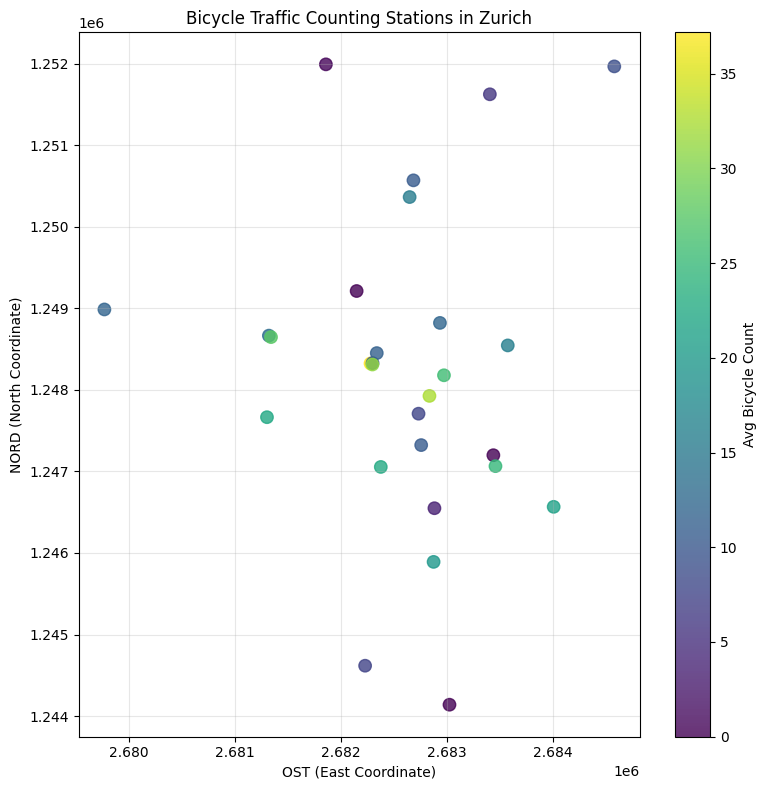

In [13]:
# Calculate average bicycle traffic per location
# Calculate total traffic (IN + OUT)
merged_df['total_velo'] = merged_df['VELO_IN'].fillna(0) + merged_df['VELO_OUT'].fillna(0)

# Group by location
avg_counts = merged_df.groupby(['FK_STANDORT', 'bezeichnung', 'OST', 'NORD'])['total_velo'].mean().reset_index()

# Remove rows with missing coordinates
avg_counts = avg_counts.dropna(subset=['OST', 'NORD'])

plt.figure(figsize=(8, 8))
plt.scatter(avg_counts['OST'], avg_counts['NORD'],
            c=avg_counts['total_velo'], cmap='viridis', s=80, alpha=0.8)
plt.colorbar(label='Avg Bicycle Count')
plt.title('Bicycle Traffic Counting Stations in Zurich')
plt.xlabel('OST (East Coordinate)')
plt.ylabel('NORD (North Coordinate)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Conclusions

In this notebook, current weather and bicycle traffic data for Zurich were collected, inspected, enriched with geodata, and visualized. The data foundation is now prepared for further analysis and modeling.

### Jupyter notebook --footer info--

In [14]:
import os
import platform
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2026-01-01 20:43:07
Python Version: 3.12.1
-----------------------------------
